In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [4]:
# load iteratiom scaling wrt dimesnionality
std02=np.load("scaling_Niclas/-0.2_0.2_std1.npz")
y02=np.load("scaling_Niclas/-0.2_0.2_werte1.npy")
x02=np.load("scaling_Niclas/-0.2_0.2_x1.npy")##

std02_new=np.load("scaling_Niclas/-0.2_0.2_std2.npz")
y02_new=np.load("scaling_Niclas/-0.2_0.2_werte2_mean.npy")##
x02_new=np.load("scaling_Niclas/-0.2_0.2_x1.npy")

std05=np.load("scaling_Niclas/-0.5_0.5_std1.npz")
y05=np.load("scaling_Niclas/-0.5_0.5_werte1.npy")##
x05=np.load("scaling_Niclas/-0.5_0.5_x1.npy")##

std1=np.load("scaling_Niclas/-1_1_std1.npy")
y1=np.load("scaling_Niclas/-1_1_werte1.npy")#
x1=np.array([10,20,30,40,50])##

stdgs=np.load("scaling_Niclas/EV1_std1.npz")
ygs=np.load("scaling_Niclas/EV1_werte1.npy")
xgs=np.load("scaling_Niclas/EV1_x1.npy")

stdgs_new=np.load("scaling_Niclas/EV1_std2_mean.npz")
ygs_new=np.load("scaling_Niclas/EV1_werte2_mean.npy")###
xgs=np.load("scaling_Niclas/EV1_x1.npy")




[1.43968853e+00 5.77730667e+01 9.62700393e+02 5.51482137e+04
 3.01580764e+05] 5 5


c:\Users\lukas.eisenmann\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            WLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     31.63
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           0.000796
Time:                        10:07:53   Log-Likelihood:                -6.9060
No. Observations:                   9   AIC:                             17.81
Df Residuals:                       7   BIC:                             18.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0125      0.633      1.600      0.1

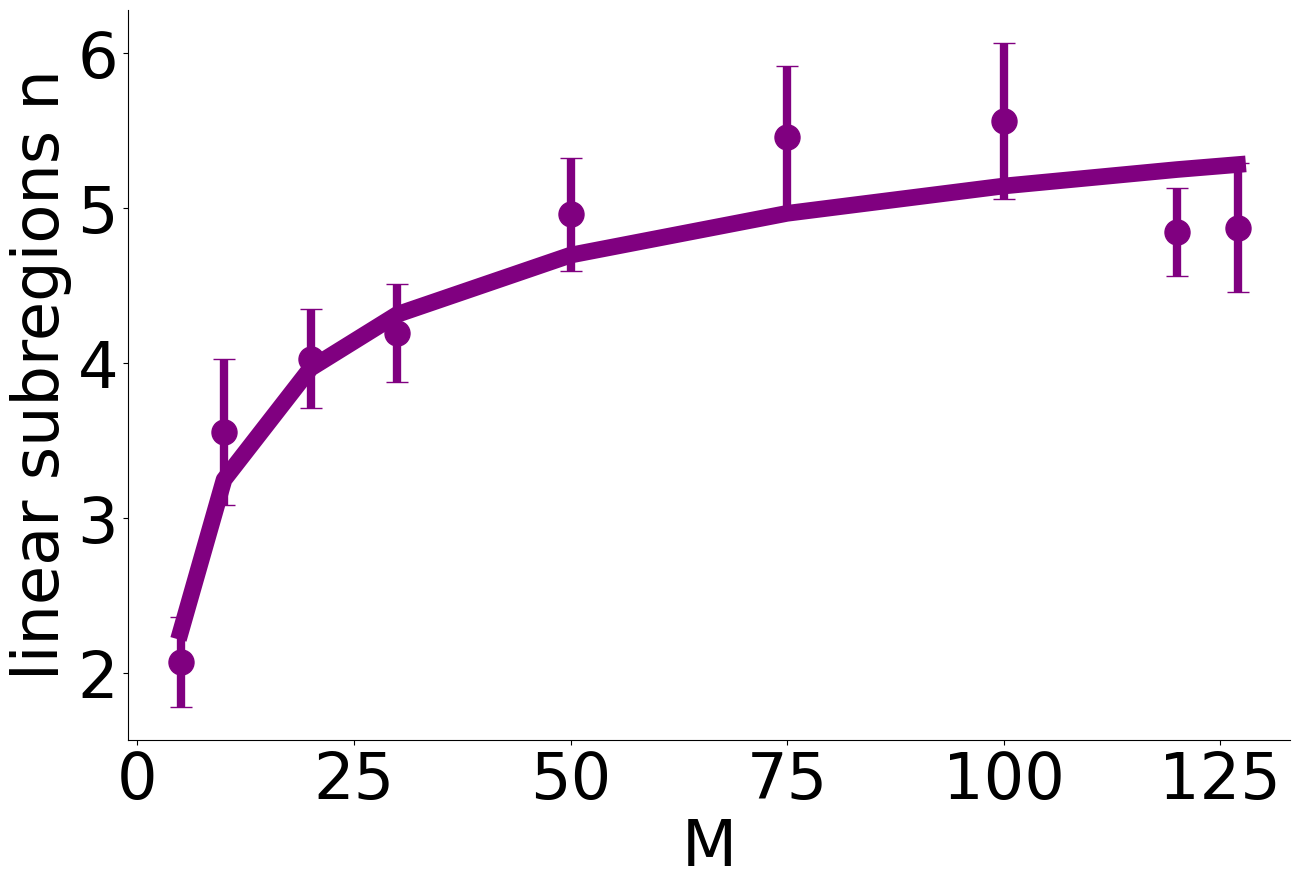

In [7]:
#fit the data
X=sm.add_constant(np.log(np.log(xgs)))
model_gs_new = sm.WLS(ygs_new,X,weights=1/stdgs_new).fit()
predictions_gs_new = model_gs_new.predict(X)
summary_gs_new = model_gs.summary()
print(summary_gs_new)
print("R^2: ",model_gs_new.rsquared)
print("p value: ", model_gs_new.pvalues[1])

#plot fit
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.errorbar(xgs,ygs_new,yerr=stdgs_new,fmt="o",capsize=8,markersize=18,elinewidth=6,color="purple")
ax.plot(xgs,predictions_gs_new,color="purple",linewidth=12)



ax.tick_params(axis='both', which='major', labelsize=46)
#ax.legend(loc="upper left",fontsize=32)
ax.set_xlabel("M",fontsize=46)
ax.set_ylabel("linear subregions n",fontsize=46)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.subplots_adjust(bottom=0.15)
#plt.show()
#plt.ylim(0,50)
plt.savefig("scaling_globally_attracting.png")



[[1.0000e+00 1.0000e+01 1.0000e+02]
 [1.0000e+00 2.0000e+01 4.0000e+02]
 [1.0000e+00 5.0000e+01 2.5000e+03]
 [1.0000e+00 7.5000e+01 5.6250e+03]
 [1.0000e+00 1.0000e+02 1.0000e+04]
 [1.0000e+00 1.2000e+02 1.4400e+04]
 [1.0000e+00 1.2700e+02 1.6129e+04]]
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            WLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1206.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           2.74e-06
Time:                        10:51:02   Log-Likelihood:                -31.156
No. Observations:                   7   AIC:                             68.31
Df Residuals:                       4   BIC:                             68.15
Df Model:                           2                                         
Covariance Type:          fixed scal

c:\Users\lukas.eisenmann\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


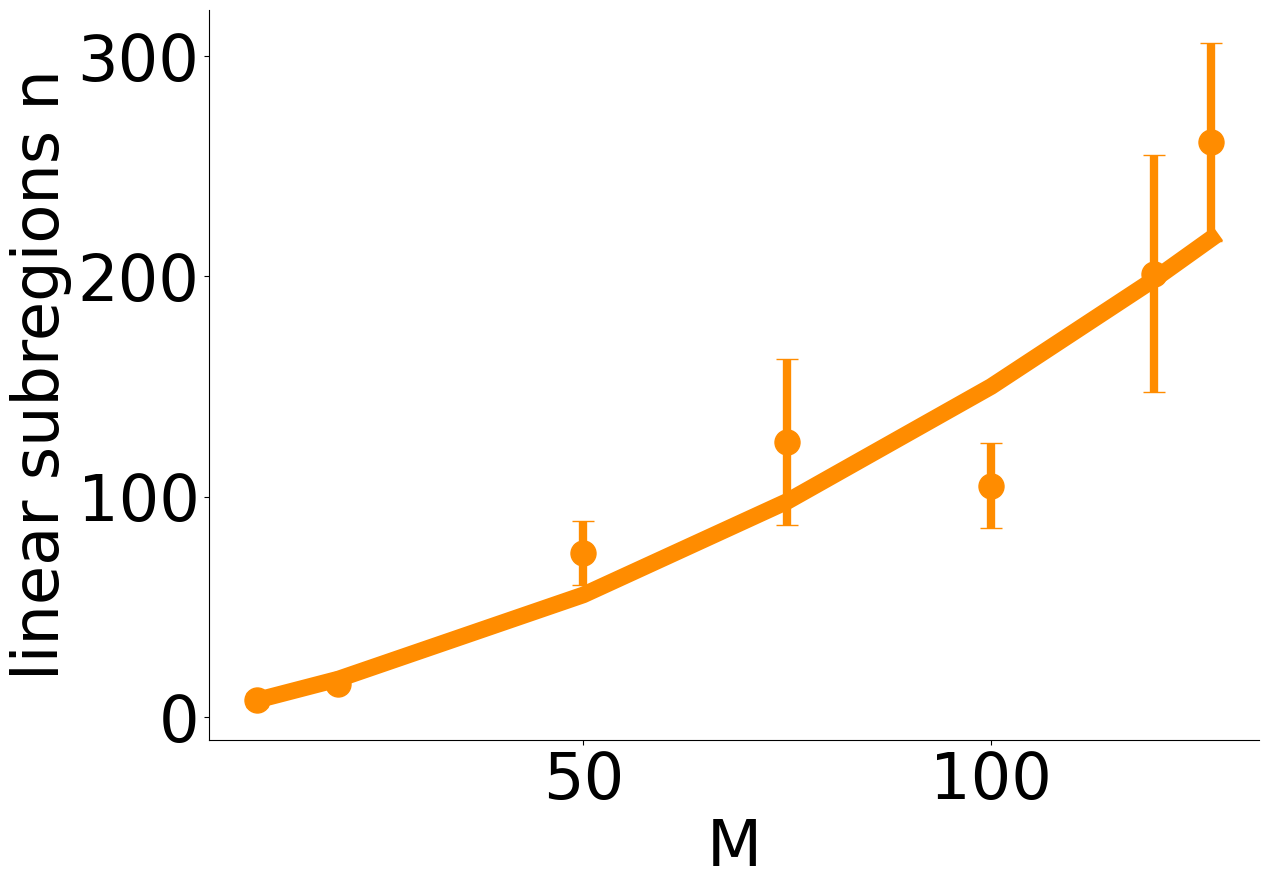

In [42]:
#fit the data polynomial
X=sm.add_constant(np.column_stack((x02,x02**2)))
print(X)
#std02[0]=1e-10
model_02_quad = sm.WLS(y02_new,X,weights=1/std02_new).fit(cov_type='fixed scale')
predictions_02_quad = model_02_quad.predict(X)
summary_02 = model_02_quad.summary()
print(summary_02)
print("R^2: ",model_02_quad.rsquared)
print("p value: ", model_02_quad.pvalues[1])

#plot fit
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.errorbar(x02,y02_new,yerr=std02_new,fmt="o",capsize=8,markersize=18,elinewidth=6, color="darkorange")
ax.plot(x02,predictions_02_quad,linewidth=12,color="darkorange")



ax.tick_params(axis='both', which='major', labelsize=46)
#ax.legend(loc="upper left",fontsize=32)
ax.set_xlabel("M",fontsize=46)
ax.set_ylabel("linear subregions n",fontsize=46)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(bottom=0.15,left=0.2)
#plt.show()
#plt.ylim(0,200)
plt.savefig("scaling_polynomial.png")
#print fit parameters
print(model_02_quad.params)
model_02_quad_ll = model_02_quad.llf
print(model_02_quad_ll)



[0.10587514 0.10488049 0.04694315 0.00195361 0.00035866]
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            WLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     15.60
Date:                Fri, 25 Aug 2023   Prob (F-statistic):             0.0290
Time:                        10:13:05   Log-Likelihood:                -3.3400
No. Observations:                   5   AIC:                             10.68
Df Residuals:                       3   BIC:                             9.899
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

c:\Users\lukas.eisenmann\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


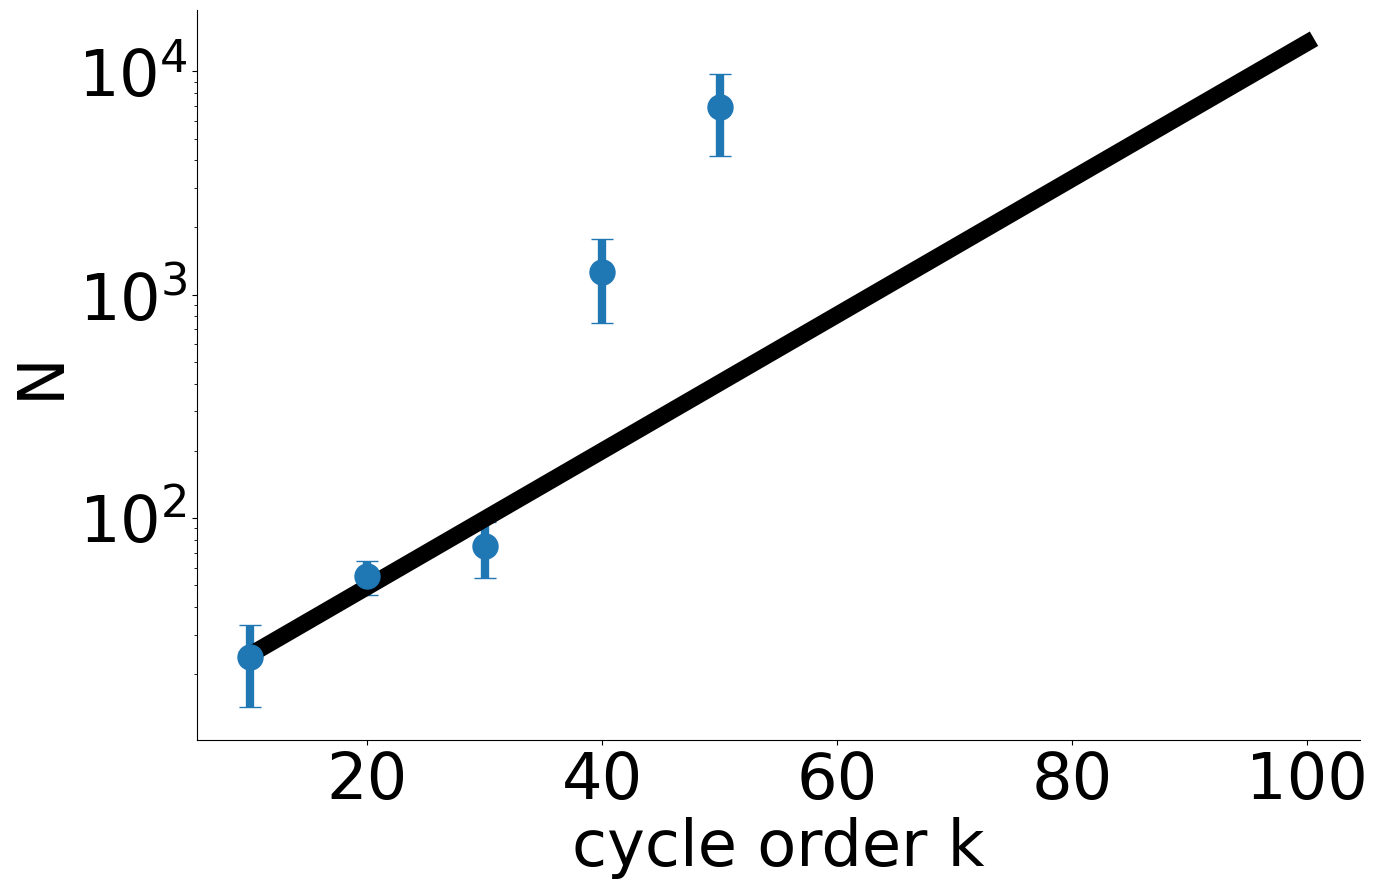

In [20]:
#fit the data
X=sm.add_constant(x05)
model_05 = sm.WLS(np.log(y05),X,weights=1/std05).fit()
print(1/std05)
predictions_05 = np.exp(model_05.predict(sm.add_constant([10,20,30,40,50,60,70,80,90,100])))
summary_05 = model_05.summary()
print(summary_05)
print("R^2: ",model_05.rsquared)
print("p value: ", model_05.pvalues[1])

#plot fit
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.errorbar(x05,y05,yerr=std05,fmt="o",capsize=8,markersize=18,elinewidth=6)
ax.plot([10,20,30,40,50,60,70,80,90,100],predictions_05,color="black",linewidth=12)



ax.tick_params(axis='both', which='major', labelsize=46)
#ax.legend(loc="upper left",fontsize=32)
ax.set_xlabel("cycle order k",fontsize=46)
ax.set_ylabel("N",fontsize=46)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yscale("log")
plt.subplots_adjust(bottom=0.15)
#plt.show()
#plt.ylim(0,50)
#plt.savefig("runtime_fit_order.png")



                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6053.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           4.68e-06
Time:                        10:13:05   Log-Likelihood:                 3.9786
No. Observations:                   5   AIC:                            -3.957
Df Residuals:                       3   BIC:                            -4.738
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5635      0.031     18.162      0.0

c:\Users\lukas.eisenmann\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


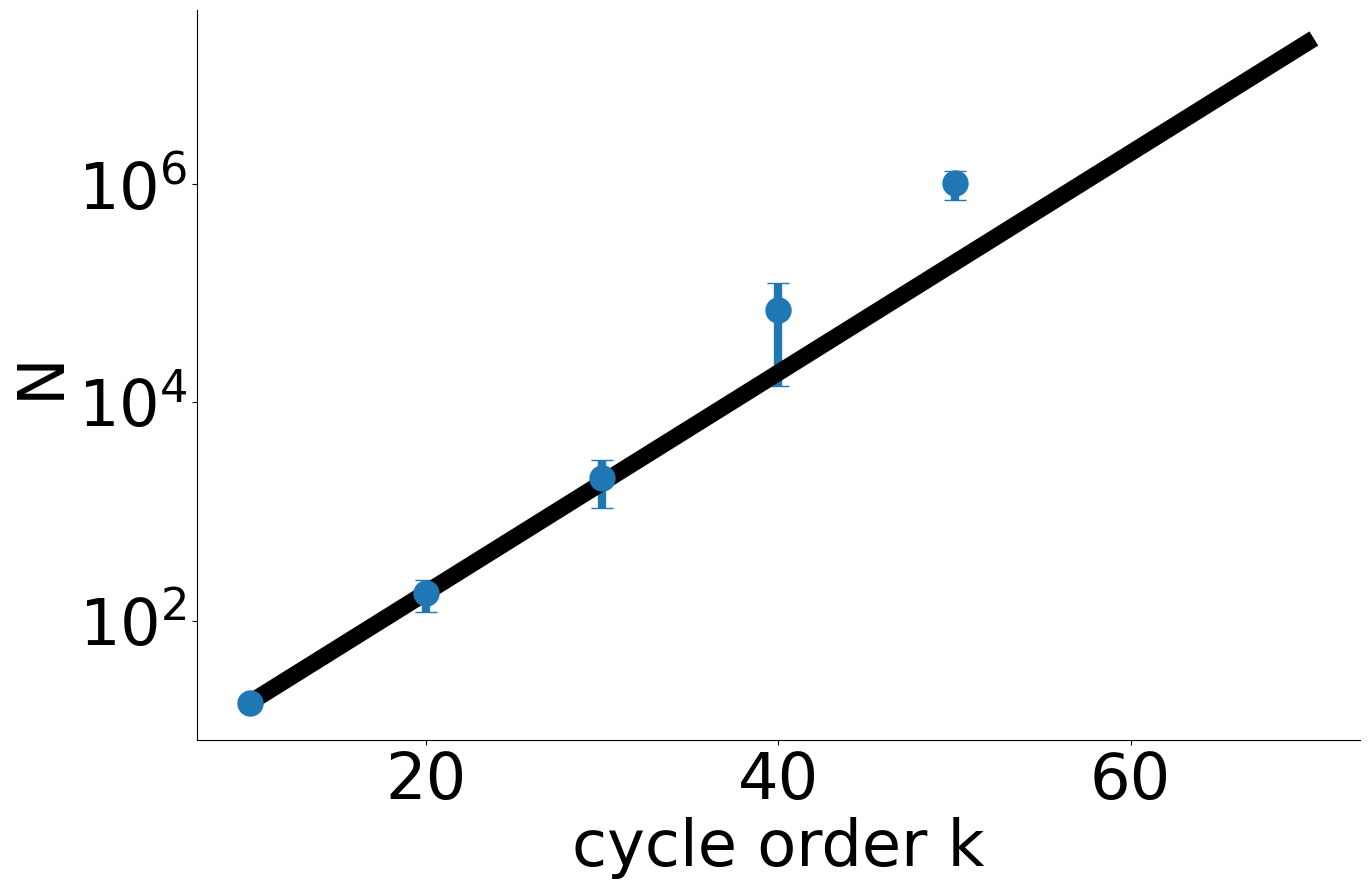

In [21]:
#fit the data
X=sm.add_constant(x1)
model_1 = sm.WLS(np.log(y1),X,weights=1/std1).fit()
predictions_1 = np.exp(model_1.predict(sm.add_constant([10,20,30,40,50,60,70])))
summary_1 = model_1.summary()
print(summary_1)
print("R^2: ",model_1.rsquared)
print("p value: ", model_1.pvalues[1])

#plot fit
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.errorbar(x1,y1,yerr=std1,fmt="o",capsize=8,markersize=18,elinewidth=6)
ax.plot([10,20,30,40,50,60,70],predictions_1,color="black",linewidth=12)



ax.tick_params(axis='both', which='major', labelsize=46)
#ax.legend(loc="upper left",fontsize=32)
ax.set_xlabel("cycle order k",fontsize=46)
ax.set_ylabel("N",fontsize=46)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yscale("log")
plt.subplots_adjust(bottom=0.15)
#plt.show()
#plt.ylim(0,50)
#plt.savefig("runtime_fit_order.png")



### all in one plot


C:\Users\lukas.eisenmann\AppData\Local\Temp\ipykernel_19260\278612225.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,10**7)


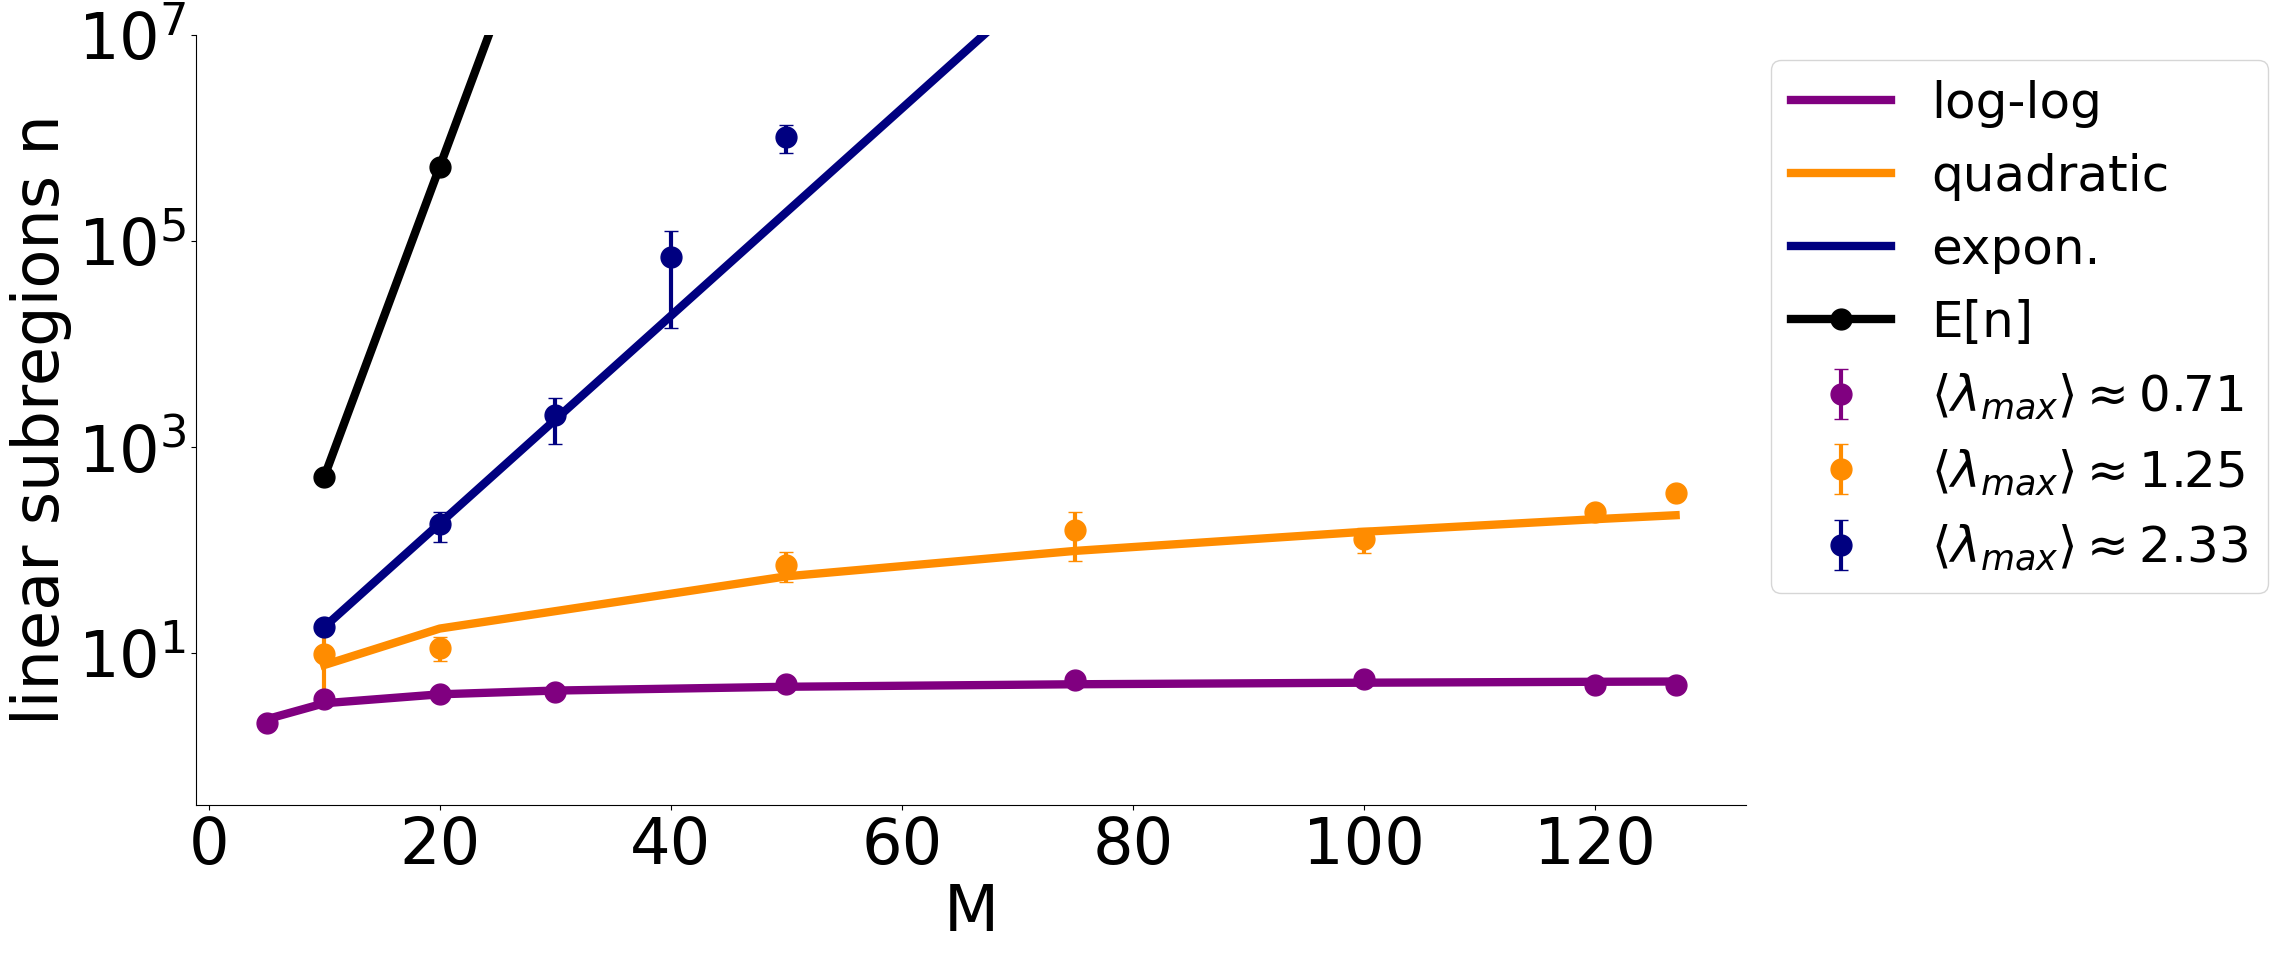

In [43]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.errorbar(xgs,ygs_new,yerr=stdgs_new,fmt="o",capsize=5,markersize=15,elinewidth=3,color="purple",label=r"$\langle\lambda_{max}\rangle \approx 0.71$")
ax.plot(xgs,predictions_gs_new,linewidth=6,color="purple",label="log-log")
ax.errorbar(x02,y02,yerr=std02,fmt="o",capsize=5,markersize=15,elinewidth=3,color="darkorange",label=r"$\langle\lambda_{max}\rangle \approx  1.25$")
ax.plot(x02,predictions_02_quad,linewidth=6,color="darkorange",label="quadratic")

##ax.errorbar(x05,y05,yerr=std05,fmt="o",capsize=5,markersize=15,elinewidth=3,color="green",label="max. eigenvalue: 1.33")
#ax.plot([10,20,30,40,50,60,70,80,90,100],predictions_05,linewidth=6,color="green",label="exponential fit")
ax.errorbar(x1,y1,yerr=std1,fmt="o",capsize=5,markersize=15,elinewidth=3,color="navy",label=r"$\langle\lambda_{max} \rangle \approx  2.33$")
ax.plot([10,20,30,40,50,60,70],predictions_1,linewidth=6,color="navy",label="expon.")

dims=[10,20,30,40,50]
N = (2.**(1. *np.array(dims))+1.)/(1+1.)
ax.plot(dims,N,markersize=15,linewidth=6,color="black",marker="o",label="E[n]")

ax.set_xlabel("M",fontsize=46)
ax.set_ylabel("linear subregions n",fontsize=46)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=36,bbox_to_anchor=(1.0, 1))
ax.tick_params(axis='both', which='major', labelsize=46)
ax.set_yscale("log")
ax.set_ylim(0,10**7)
plt.savefig("scaling.png",bbox_inches='tight')





                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            WLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1335.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           3.46e-21
Time:                        10:45:35   Log-Likelihood:                -136.54
No. Observations:                  24   AIC:                             277.1
Df Residuals:                      22   BIC:                             279.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9053      0.021     89.890      0.0

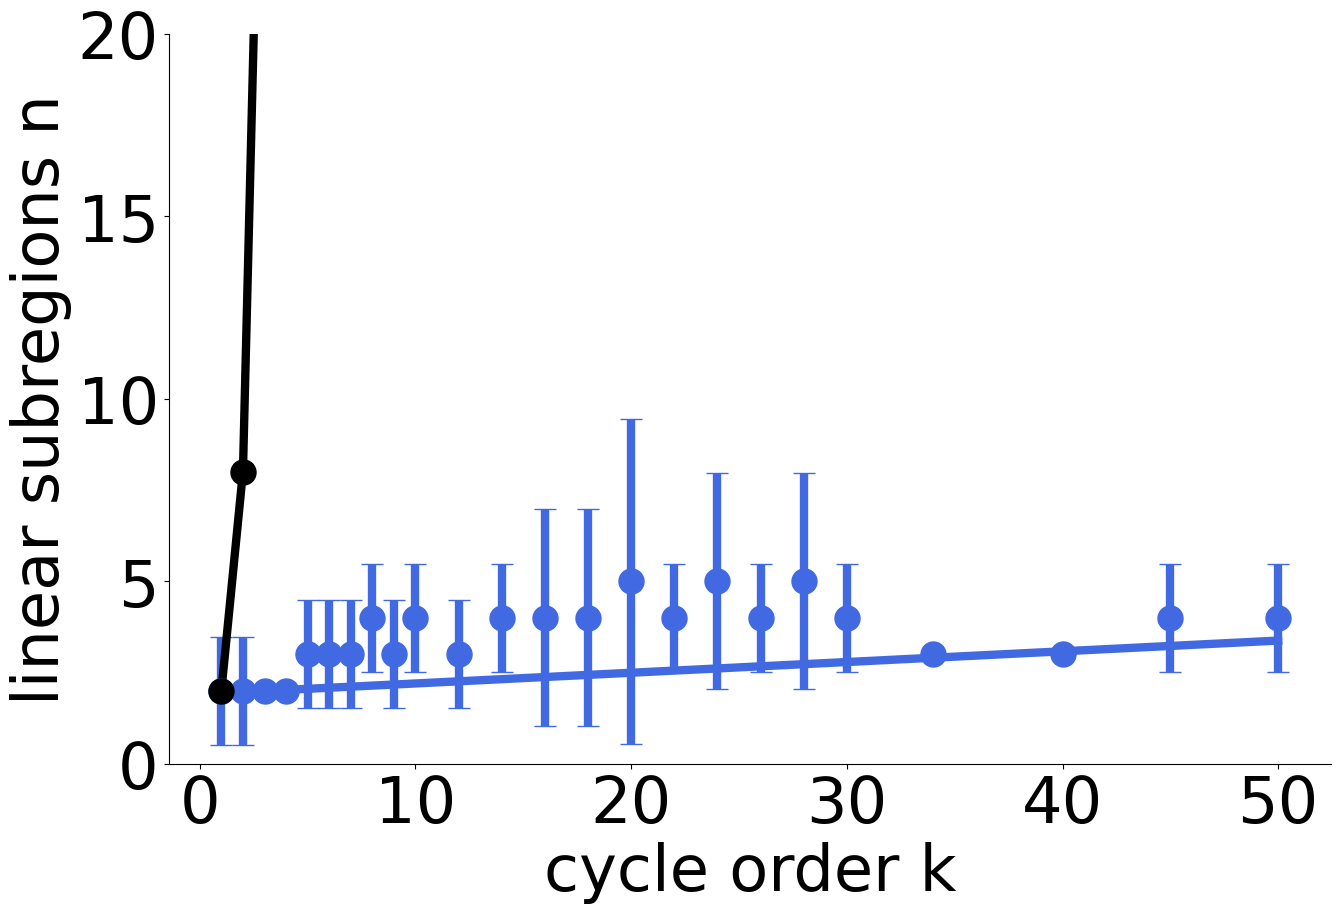

In [34]:
data=np.load("performance_helios/algorithm_performance_linear_regions.npy")
order_regions_h=data["x"][:-1]
lin_regions_h=data["y"][:-1]
err_regions_h=data["err"][:-1]
X=sm.add_constant(order_regions_h)
model = sm.WLS(lin_regions_h,X,weights=1/(err_regions_h+1e-8)).fit()
predictions = model.predict(X)
summary = model.summary()
print(summary)
print("R^2: ",model.rsquared)
print("p value: ", model.pvalues[1])
#plot fit
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.errorbar(order_regions_h,lin_regions_h,yerr=err_regions_h,fmt="o",capsize=8,markersize=18,elinewidth=6,color="royalblue")
ax.plot(order_regions_h,predictions,color="royalblue",linewidth=6)

#plt.ylim(0,20)

number_cycles = np.array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2,2,2,2,2,2,2,2])

N = [2,8,32] #(2.**(2. *np.array(order_regions_h))+1.)/(number_cycles+1.)
ax.plot([1,2,3],N, markersize=18,linestyle="-",linewidth=6,color="black")#(0.8, 0.4, 0.0))
ax.errorbar([1,2,3],N,fmt="o",capsize=8,markersize=18,elinewidth=6,linewidth=6,color="black")
print(order_regions_h)



ax.tick_params(axis='both', which='major', labelsize=46)
#ax.legend(loc="upper left",fontsize=32)
ax.set_xlabel("cycle order k",fontsize=46)
ax.set_ylabel("linear subregions n",fontsize=46)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(0,20)
#plt.legend(loc="upper left")
plt.subplots_adjust(bottom=0.15)#,left=0.15)
plt.savefig("lin_regions_fit.png")

plt.show()